# Module 4: Data Sharing and Next Steps.


In this section we will examine how to align assembled genomes, perform phylogenetic analysis and interpret phylogenetic trees for outbreak investigations.


As you have perfomed before:

1.) Click on File on the top left corner and select save a copy in drive
Your changes will not be saved if you do not do this step.

2.) Click on the name of the workbook in the top left corner and replace "Copy of" with your full name.

You will be submitting the downloaded notebook file as your proof of completion for this module.

# **Part 1**: Phylogenetics and interpretation

## Let's install analysis packages needed.

For this portion we will use:  
**seqtk** for assess genome quality (https://github.com/lh3/seqtk)  
**Mafft** for genome alignment (https://mafft.cbrc.jp/alignment/software/)  
**snp-site** for quick SNP difference assessment (https://github.com/sanger-pathogens/snp-sites)  
**Fasttree** for phylogenetic tree building (http://www.microbesonline.org/fasttree/)  
**Phylo** from biopython for quick tree visualisation (https://biopython.org/wiki/Phylo). *Note*: there are lots of tree visualisaiton programmes, most commonly used are ggtree(R), ete3 (python) and itol (https://itol.embl.de/).  

microreact account (https://microreact.org/), which you can setup/sign in with your google account.

In [2]:
!python --version

Python 3.8.15


In [3]:
!pip install -q condacolab
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [1]:
!conda install -c conda-forge biopython

Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - biopython


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    biopython-1.80             |   py38h0a891b7_0         2.4 MB  conda-forge
    ca-certificates-2022.12.7  |       ha878542_0         143 KB  conda-forge
    certifi-2022.12.7          |     pyhd8ed1ab_0         147 KB  conda-forge
    colorama-0.4.6             |     pyhd8ed1ab_0          25 KB  conda-forge
    conda-22.11.1              |   py38h578d9bd_1         905 KB  conda-forge
    libblas-3.9.0              |16_linux64_openblas          13 KB  conda-forge
    libcblas-3.9.0             |16_linux64_openblas          13 KB  conda-forge
    libgfortran-ng-12.2.0      |      h69a702a_19          22 KB

In [4]:
!conda install -c bioconda mafft snp-sites fasttree seqtk snp-dists


Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - fasttree
    - mafft
    - seqtk
    - snp-dists
    - snp-sites


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    fasttree-2.1.11            |       hec16e2b_1         252 KB  bioconda
    llvm-openmp-8.0.1          |       hc9558a2_0         439 KB  conda-forge
    mafft-7.508                |       hec16e2b_0         3.1 MB  bioconda
    openmp-8.0.1               |                0           8 KB  conda-forge
    seqtk-1.3                  |       h7132678_4          37 KB  bioconda
    snp-dists-0.8.2            |       h7132678_1          25 KB  bioconda
    snp-sites-2.5.1            |       h7132678_2          41 KB  bioconda
    zlib-1.2.13                |       h166bdaf_4   

## Download dataset to be analysed.

There are three datasets associated with this module. First two datasets are examples in the instruction slides. The last datasset is assemsment dataset. Analysing the example datasets alongside the instruction videos will give you the experience needed to analyse the assesment dataset.

In [5]:
!wget https://wcs_data_transfer.cog.sanger.ac.uk/Module4_data_zip.zip
!unzip Module4_data_zip.zip

--2022-12-15 06:25:35--  https://wcs_data_transfer.cog.sanger.ac.uk/Module4_data_zip.zip
Resolving wcs_data_transfer.cog.sanger.ac.uk (wcs_data_transfer.cog.sanger.ac.uk)... 193.62.203.62, 193.62.203.63, 193.62.203.61
Connecting to wcs_data_transfer.cog.sanger.ac.uk (wcs_data_transfer.cog.sanger.ac.uk)|193.62.203.62|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 480131 (469K) [application/zip]
Saving to: ‘Module4_data_zip.zip’

Module4_data_zip.zi 100%[===================>] 468.88K   915KB/s    in 0.5s    

2022-12-15 06:25:37 (915 KB/s) - ‘Module4_data_zip.zip’ saved [480131/480131]

Archive:  Module4_data_zip.zip
  inflating: Module4_data/paper_link.docx  
  inflating: Module4_data/dataset_1_flight/20CV0408.fasta  
  inflating: Module4_data/dataset_1_flight/20CV0415.fasta  
  inflating: Module4_data/dataset_1_flight/20CV0409.fasta  
  inflating: Module4_data/ENA submission data/CaseA_manifest.txt  
  inflating: Module4_data/dataset_1_flight/20CV0401.fasta  

### Dataset 1

First we will assess genome quality to see if the genomes are good enough for analysis. For SARs_CoV2, we are mainly interested in the number of Ns. The package we will use is seqtk comp, which gives a lots of statistics for a given sequence file in fasta format.   

Output format: chr, length, #A, #C, #G, #T, #2, #3, #4, #CpG, #tv, #ts, #CpG-ts

9th column, #4 is the number of Ns, 4 ambiguities, ie A, G, T, or C.

If you have separated fasta files, it might be easier to combine the files together.  Otherwise, you have to go through the genome files separately.

In [34]:
!ls
!pwd 
%cd /content/Module4_data/dataset_1_flight/
!ls

 assignment	    dataset_2_hotel	   paper_link.docx
 dataset_1_flight  'ENA submission data'
/content/Module4_data
/content/Module4_data/dataset_1_flight
20CV0398.fasta	20CV0408.fasta	20CV0410.fasta	20CV0415.fasta
20CV0401.fasta	20CV0409.fasta	20CV0414.fasta	dataset_1_flight_metadata.tsv


In [31]:
#cat (concatenate) command combine the fastas into one file
#seqtk comp analysis the sequence information
#cut -f 1,9 selects the column 1 and 9, the information we need.
!cat Module4_data/dataset_1_flight/*.fasta > dataset_1_flight_combined.fasta
!seqtk comp dataset_1_flight_combined.fasta | cut -f 1,9 > dataset_1_quality.tsv

cat: 'Module4_data/dataset_1_flight/*.fasta': No such file or directory


In [29]:
#cat (concatenate) command combine the fastas into one file
#seqtk comp analysis the sequence information
#cut -f 1,9 selects the column 1 and 9, the information we need.
!cat Module4_data/assignment/22NZ*.fasta > assignment_combined.fasta
!seqtk comp assignment_combined.fasta | cut -f 1,9 > assignment_quality.tsv

cat: 'Module4_data/assignment/22NZ*.fasta': No such file or directory


In [7]:
!cat dataset_1_quality.tsv

hCoV-19/NewZealand/20CV0398/2020	0
hCoV-19/NewZealand/20CV0401/2020	1
hCoV-19/NewZealand/20CV0408/2020	1
hCoV-19/NewZealand/20CV0409/2020	1
hCoV-19/NewZealand/20CV0410/2020	1140
hCoV-19/NewZealand/20CV0414/2020	0
hCoV-19/NewZealand/20CV0415/2020	1


Quality looks good, 20CV0410 is not as good as the rest. It  has 1140 ambiguous bases but it is good enough for analysis. In general, we require 90%, or fewer than **3000** Ns the genome to be assembled for phylogenetic tree analysis. However, there are groups that has less stringent requirrments, some go as low as 50%. Having 70% of the genome assembled is the default in pangolin for lineage assignment.

### alignment

We will use mafft for alignment. It is fairly fast and pretty accurate.

There are many options for alignning sequences in mafft. --auto is a good option where the programme itself chooses the most efficient (good balance between speed and accuracy) algorithm. Alignment could take days to align long sequences if using the most accurate algorthm.If you are aligning short sequences, such as a region of the spike gene/protein, you can use more accurate options. The mafft website has good examples of what to use when.

For mafft to align the sequences, in our case whole genomes, you need to combine the sequnence you want to align into one file. Good thing is you have done that already and since all genomes are good we don't need to exclude any from the alignment. 

In [8]:
!mafft --auto dataset_1_flight_combined.fasta > dataset_1_flight_aligned.fasta

nthread = 0
nthreadpair = 0
nthreadtb = 0
ppenalty_ex = 0
stacksize: 8192 kb
generating a scoring matrix for nucleotide (dist=200) ... done
Gap Penalty = -1.53, +0.00, +0.00



Making a distance matrix ..

There are 1144 ambiguous characters.
    1 / 7
done.

Constructing a UPGMA tree (efffree=0) ... 
    0 / 7
done.

Progressive alignment 1/2... 
STEP     6 / 6  f
done.

Making a distance matrix from msa.. 
    0 / 7
done.

Constructing a UPGMA tree (efffree=1) ... 
    0 / 7
done.

Progressive alignment 2/2... 
STEP     6 / 6  f
done.

disttbfast (nuc) Version 7.508
alg=A, model=DNA200 (2), 1.53 (4.59), -0.00 (-0.00), noshift, amax=0.0
0 thread(s)


Strategy:
 FFT-NS-2 (Fast but rough)
 Progressive method (guide trees were built 2 times.)

If unsure which option to use, try 'mafft --auto input > output'.
For more information, see 'mafft --help', 'mafft --man' and the mafft page.

The default gap scoring scheme has been changed in version 7.110 (2013 Oct).
It tends to insert more 

### quick look at the genome differences
snp-site is a really good software to give you an idea how closely related your genomes of interest are. For small datasets such as this, this is really good. It analyses your alignment and give you a SNP alignmern as default. it can also give you snp information in VCF format.

In [9]:
!snp-sites dataset_1_flight_aligned.fasta

>hCoV-19/NewZealand/20CV0398/2020
G
>hCoV-19/NewZealand/20CV0401/2020
T
>hCoV-19/NewZealand/20CV0408/2020
G
>hCoV-19/NewZealand/20CV0409/2020
G
>hCoV-19/NewZealand/20CV0410/2020
G
>hCoV-19/NewZealand/20CV0414/2020
G
>hCoV-19/NewZealand/20CV0415/2020
G


from this quick look, you will see most of genomes are indistinguishable, apart from 20CV0401 which has an additional SNP. 

### interpretation

what can we say about a bunch of identical genomes?  

Since we know these people came on the same flight, we can analyse one of the genomes using https://genome.ucsc.edu/cgi-bin/hgPhyloPlace or if you have an account you can use the GISAID audacity programme to find the closest international genome. Download a genome and try this with your web browser.

see publication https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7920679/ for the analysis of this dataset.

In [10]:
!cat Module4_data/dataset_1_flight/dataset_1_flight_metadata.tsv

Case	Accession	GISAIDID	PreflightTestinResult	PreflightTestinDate	SymtomOnset	DatePositveTest	CT	CountryOfOrigin	LayoverTime	FlightSeat	BusToQuranteenHotel
A	20CV0408	EPI_ISL_582019	Negative	2020-09-24	2020-10-01	2020-10-02	16.40	Switzerland	9h27min	26G	Bus1
B	20CV0409	EPI_ISL_582020	Negative	2020-09-24	2020-10-02	2020-10-02	29.30	Switzerland	9h27min	26D	Bus1
C	20CV0410	EPI_ISL_582021	Negative	2020-09-25	Asymptomatic	2020-10-02	36.80	Ukraine	11h30min	24C	"Bus1briefly,transportedonbus2"
D	20CV0401	EPI_ISL_582018	Negative	2020-09-24	2020-10-04	2020-10-07	20.40	Ireland	8h18min	27D	Bus1
E	20CV0398	EPI_ISL_582017	NotTested	NA	Asymptomatic	2020-10-06	22.30	India	70h54min	28G	Bus3
F	20CV0414	EPI_ISL_582022	Negative	2020-09-25	2020-10-03	2020-10-08	22.30	SouthAfrica	5h44min	24D/E/F/G	Bus2
G	20CV0415	EPI_ISL_582023	NotTested	NA	2020-10-09	2020-10-08	19.10	SouthAfrica	5h44min	24D/E/F/G	Bus2


### Dataset 2

In [11]:
!seqtk comp Module4_data/dataset_2_hotel/dataset_2_quarantineHotel.fasta | cut -f 1,9 > dataset_2_quality.tsv
!cat dataset_2_quality.tsv
#are the genome assemblies of good quality?

hCoV-19/NewZealand/20CV0362/2020	1
hCoV-19/NewZealand/20CV0364/2020	1
hCoV-19/NewZealand/20CV0365/2020	480
hCoV-19/NewZealand/20CV0350/2020	0
hCoV-19/NewZealand/20CV0357/2020	1
hCoV-19/NewZealand/20CV0358/2020	0
hCoV-19/NewZealand/20CV0332/2020	219
hCoV-19/NewZealand/20CV0221/2020	220
hCoV-19/NewZealand/20CV0224/2020	218


In [12]:
#fasta files are already concatenated.
!mafft --auto Module4_data/dataset_2_hotel/dataset_2_quarantineHotel.fasta > dataset_2_quarantineHotel_aligned.fasta

nthread = 0
nthreadpair = 0
nthreadtb = 0
ppenalty_ex = 0
stacksize: 8192 kb
generating a scoring matrix for nucleotide (dist=200) ... done
Gap Penalty = -1.53, +0.00, +0.00



Making a distance matrix ..

There are 1140 ambiguous characters.
    1 / 9
done.

Constructing a UPGMA tree (efffree=0) ... 
    0 / 9
done.

Progressive alignment 1/2... 
STEP     8 / 8  f
done.

Making a distance matrix from msa.. 
    0 / 9
done.

Constructing a UPGMA tree (efffree=1) ... 
    0 / 9
done.

Progressive alignment 2/2... 
STEP     8 / 8  f
done.

disttbfast (nuc) Version 7.508
alg=A, model=DNA200 (2), 1.53 (4.59), -0.00 (-0.00), noshift, amax=0.0
0 thread(s)


Strategy:
 FFT-NS-2 (Fast but rough)
 Progressive method (guide trees were built 2 times.)

If unsure which option to use, try 'mafft --auto input > output'.
For more information, see 'mafft --help', 'mafft --man' and the mafft page.

The default gap scoring scheme has been changed in version 7.110 (2013 Oct).
It tends to insert more 

In [13]:
!snp-sites dataset_2_quarantineHotel_aligned.fasta

>hCoV-19/NewZealand/20CV0362/2020
TTGT
>hCoV-19/NewZealand/20CV0364/2020
TTGT
>hCoV-19/NewZealand/20CV0365/2020
CTAG
>hCoV-19/NewZealand/20CV0350/2020
CTAT
>hCoV-19/NewZealand/20CV0357/2020
CTAT
>hCoV-19/NewZealand/20CV0358/2020
CTAT
>hCoV-19/NewZealand/20CV0332/2020
CTAG
>hCoV-19/NewZealand/20CV0221/2020
CCAG
>hCoV-19/NewZealand/20CV0224/2020
CCAG


In [14]:
#can look at snp distance between pairs of samples using snp-dist
!snp-dists dataset_2_quarantineHotel_aligned.fasta


This is snp-dists 0.8.2
Will use 1 threads.
Read 9 sequences of length 29782
snp-dists 0.8.2	hCoV-19/NewZealand/20CV0362/2020	hCoV-19/NewZealand/20CV0364/2020	hCoV-19/NewZealand/20CV0365/2020	hCoV-19/NewZealand/20CV0350/2020	hCoV-19/NewZealand/20CV0357/2020	hCoV-19/NewZealand/20CV0358/2020	hCoV-19/NewZealand/20CV0332/2020	hCoV-19/NewZealand/20CV0221/2020	hCoV-19/NewZealand/20CV0224/2020
hCoV-19/NewZealand/20CV0362/2020	0	0	3	2	2	2	3	4	4
hCoV-19/NewZealand/20CV0364/2020	0	0	3	2	2	2	3	4	4
hCoV-19/NewZealand/20CV0365/2020	3	3	0	1	1	1	0	1	1
hCoV-19/NewZealand/20CV0350/2020	2	2	1	0	0	0	1	2	2
hCoV-19/NewZealand/20CV0357/2020	2	2	1	0	0	0	1	2	2
hCoV-19/NewZealand/20CV0358/2020	2	2	1	0	0	0	1	2	2
hCoV-19/NewZealand/20CV0332/2020	3	3	0	1	1	1	0	1	1
hCoV-19/NewZealand/20CV0221/2020	4	4	1	2	2	2	1	0	0
hCoV-19/NewZealand/20CV0224/2020	4	4	1	2	2	2	1	0	0


The alignment is a little bit more complicated with more differences, we need a phylogenetic tree to visualise the relationships

In [15]:
!fasttree -nt -gtr -gamma dataset_2_quarantineHotel_aligned.fasta > dataset_2_quarantineHotel_aligned.nwk

FastTree Version 2.1.11 Double precision (No SSE3)
Alignment: dataset_2_quarantineHotel_aligned.fasta
Nucleotide distances: Jukes-Cantor Joins: balanced Support: SH-like 1000
Search: Normal +NNI +SPR (2 rounds range 10) +ML-NNI opt-each=1
TopHits: 1.00*sqrtN close=default refresh=0.80
ML Model: Generalized Time-Reversible, CAT approximation with 20 rate categories
Ignored unknown character n (seen 1139 times)
Initial topology in 0.04 seconds
Refining topology: 12 rounds ME-NNIs, 2 rounds ME-SPRs, 6 rounds ML-NNIs
Total branch-length 0.000 after 0.36 sec

WARNING! This alignment consists of closely-related and very-long sequences.
WARNING! FastTree (or other standard maximum-likelihood tools)
may not be appropriate for aligments of very closely-related sequences
like this one, as FastTree does not account for recombination or gene conversion

ML-NNI round 1: LogLk = -41334.820 NNIs 2 max delta 0.00 Time 0.70
GTR Frequencies: 0.2985 0.1834 0.1963 0.3217
GTR rates(ac ag at cg ct gt) 0.035

In [16]:
!cat dataset_2_quarantineHotel_aligned.nwk
#as you can see it is quite difficult to interpret this format without visualising in tree-form


((hCoV-19/NewZealand/20CV0362/2020:0.0,hCoV-19/NewZealand/20CV0364/2020:0.0):0.000076644,hCoV-19/NewZealand/20CV0350/2020:0.000000005,(hCoV-19/NewZealand/20CV0357/2020:0.000000005,(hCoV-19/NewZealand/20CV0358/2020:0.000000005,((hCoV-19/NewZealand/20CV0221/2020:0.000000005,hCoV-19/NewZealand/20CV0224/2020:0.000000005)0.864:0.000038599,(hCoV-19/NewZealand/20CV0365/2020:0.000000006,hCoV-19/NewZealand/20CV0332/2020:0.000000005)0.888:0.000000006)0.854:0.000038599)0.000:0.000000005)0.544:0.000000005);


In [17]:
from Bio import Phylo

tree = Phylo.read("dataset_2_quarantineHotel_aligned.nwk", "newick")
print("tree")
Phylo.draw_ascii(tree)


tree
                                           , hCoV-19/NewZealand/20CV0362/2020
  _________________________________________|
 |                                         | hCoV-19/NewZealand/20CV0364/2020
 |
_| hCoV-19/NewZealand/20CV0350/2020
 |
 , hCoV-19/NewZealand/20CV0357/2020
 |
 , hCoV-19/NewZealand/20CV0358/2020
 |
 |                                         , hCoV-19/NewZealand/20CV0221/2020
 |                     ____________________|
 |                    |                    | hCoV-19/NewZealand/20CV0224/2020
 |____________________|
                      , hCoV-19/NewZealand/20CV0365/2020
                      |
                      | hCoV-19/NewZealand/20CV0332/2020



interpretation

This dataset is about an incursion and onward spread into the community from quarantine hotel. What can we say about that tree? Follow the publication and instruction video. Metadata associated with the case in dataset_2_hotel/dataset_2_quarantineHotel_metadata.tsv. 


see publication https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8084504/ for the analysis of this dataset.

Compare the above tree to the publication, how come it looks different?

In [18]:
!cat Module4_data/dataset_2_hotel/dataset_2_quarantineHotel_metadata.tsv

Case-patient	Name	GISAIDAccession	Symptomonset	datePositivesample	India to Fiji: Aug 26	Fiji to Christchurch: Aug 27	Christchurch to Auckland: Sep 11	PossibleSource	PossiblePlace
A	20CV0221	EPI_ISL_548116	Asymptomatic	Aug-30	Row 50�55	7D	19A	Residence overseas	India
B	20CV0224	EPI_ISL_548118	Aug-29	Aug-30	53A	19D	Not on flight	Case-patient A or same source as case-patient A	In India or during travel to New Zealand
C	20CV0332	EPI_ISL_579092	Sep-06	Sep-08	49D	10F	Not on flight	Case-patients A or B	During travel to New Zealand
D	20CV0365	EPI_ISL_579108	Asymptomatic	Sep-21	NR	17C	5A	Case-patient C	MIQ
E	20CV0362	EPI_ISL_579105	Asymptomatic	Sep-21	NR	17C	5A	Case-patient D	MIQ (child of case-patient D)
F	20CV0364	EPI_ISL_579107	Sep-22	Sep-21	Not on flight	Not on flight	Not on flight	Case-patient E	Household (parent of case-patient E)
G	20CV0357	EPI_ISL_579103	Sep-15	Sep-17	55G	18F	4A	Case-patient D	Domestic flight from Christchurch to Auckland
H	20CV0358	EPI_ISL_579104	Sep-17	Sep-19	Not on f

In [19]:
#let's add the 2020 reference genome to the dataset. 
!mafft --auto --add Module4_data/dataset_2_hotel/dataset_2_quarantineHotel.fasta Module4_data/dataset_2_hotel/references.fasta > dataset_2_quarantineHotel_aligned_ref.fasta

nadd = 9
nthread = 0
nthreadpair = 0
nthreadtb = 0
ppenalty_ex = 0
stacksize: 8192 kb
generating a scoring matrix for nucleotide (dist=200) ... done
Gap Penalty = -1.53, +0.00, +0.00



Making a distance matrix ..

There are 1140 ambiguous characters.
    1 / 10
done.

Constructing a UPGMA tree (efffree=0) ... 
    0 / 10
done.

Progressive alignment 1/2... 
STEP     9 / 9  f
done.

Making a distance matrix from msa.. 
    0 / 10
done.

Constructing a UPGMA tree (efffree=1) ... 
    0 / 10
done.

Progressive alignment 2/2... 
STEP     9 / 9  f
done.

disttbfast (nuc) Version 7.508
alg=A, model=DNA200 (2), 1.53 (4.59), -0.00 (-0.00), noshift, amax=0.0
0 thread(s)


Strategy:
 FFT-NS-2 (Fast but rough)
 Progressive method (guide trees were built 2 times.)

If unsure which option to use, try 'mafft --auto input > output'.
For more information, see 'mafft --help', 'mafft --man' and the mafft page.

The default gap scoring scheme has been changed in version 7.110 (2013 Oct).
It tends to

In [20]:
!fasttree -nt -gtr -gamma dataset_2_quarantineHotel_aligned_ref.fasta > dataset_2_quarantineHotel_aligned_ref.nwk

FastTree Version 2.1.11 Double precision (No SSE3)
Alignment: dataset_2_quarantineHotel_aligned_ref.fasta
Nucleotide distances: Jukes-Cantor Joins: balanced Support: SH-like 1000
Search: Normal +NNI +SPR (2 rounds range 10) +ML-NNI opt-each=1
TopHits: 1.00*sqrtN close=default refresh=0.80
ML Model: Generalized Time-Reversible, CAT approximation with 20 rate categories
Ignored unknown character n (seen 1139 times)
Initial topology in 0.04 seconds
Refining topology: 13 rounds ME-NNIs, 2 rounds ME-SPRs, 6 rounds ML-NNIs
Total branch-length 0.001 after 0.42 sec

WARNING! This alignment consists of closely-related and very-long sequences.
WARNING! FastTree (or other standard maximum-likelihood tools)
may not be appropriate for aligments of very closely-related sequences
like this one, as FastTree does not account for recombination or gene conversion

ML-NNI round 1: LogLk = -41673.641 NNIs 4 max delta 0.00 Time 0.87
GTR Frequencies: 0.2986 0.1834 0.1963 0.3216
GTR rates(ac ag at cg ct gt) 0

Now if we root the phylogeny using the reference, the tree looks more like the publication. How come?  

Have a look at the snp alignment as well using snp-site. You will see that using the reference allowed the identification of ancestral bases, so now we know what nucleotide changes are mutations from wildtype. Previously the tree algorithm made the assumption that the majority base is the ancestral sequence, which is not correct.

In [21]:
from Bio import Phylo

treeOutgroup = Phylo.read("dataset_2_quarantineHotel_aligned_ref.nwk", "newick")
treeOutgroup.root_with_outgroup({"name": "nCoV2019|Wuhan-Hu-1|MN908947|China|Wuhan|2019-12"}) 
print("treeOutgroup")
Phylo.draw_ascii(treeOutgroup)

treeOutgroup
                                , hCoV-19/NewZealand/20CV0358/2020
                                |
                                , hCoV-19/NewZealand/20CV0357/2020
                                |
                               ,|   , hCoV-19/NewZealand/20CV0362/2020
                               ||___|
                               ||   | hCoV-19/NewZealand/20CV0364/2020
                               ||
                               || hCoV-19/NewZealand/20CV0350/2020
                              _|
                             | | hCoV-19/NewZealand/20CV0332/2020
                             | |
                             | | hCoV-19/NewZealand/20CV0365/2020
  ___________________________|
 |                           | hCoV-19/NewZealand/20CV0224/2020
_|                           |
 |                           | hCoV-19/NewZealand/20CV0221/2020
 |
 | nCoV2019|Wuhan-Hu-1|MN908947|China|Wu...



## watch micoreact and nextstrain demo/video

looking at trees this way is pretty difficult, there are some good tools out there that allows interactive trees and metadate visualisation.

https://docs.microreact.org/   
https://nextstrain.org/community/narratives/ESR-NZ/GenomicsNarrativeSARSCoV2/aotearoa-border-incursions

Demo microreact project of dataset 2   
https://microreact.org/project/5ELv2rXSKKeZ8XZCFXq9Ug-dataset2hotel


### Other tools for larger datasets and tree building
mafft even at the minimum accuracy model can be quite slow once you have 1000s of genomes to align. To speed things up, you can add new genomes to existing alignments or divide genomes into groups such as lineages or sublineages and then merge the alignments. The mafft website has good explaination of these tricks and their issues.    

nextalign is another tool you can use. It is super fast! (https://docs.nextstrain.org/projects/nextclade/en/stable/user/nextalign-cli.html)  

igtree2 is a comprehensive (not Baysian) phylogeny building package that can test for best substition models for your dataset, perform bootstrap analysis, compare phylogeny etc etc. It is probably one of the best tree building tools (that is reasnabley fast) out there currently. (http://www.iqtree.org/)

usher is a software package that allows adding sequences to existing trees without doing all the alignment again. (https://www.nature.com/articles/s41588-021-00862-7) We used this when we analysed the flight dataset. There are some caveats and issues you need to be aware of. If the existing alignment is really clean and the sequences to be added are high-quality, using usher is a good fast way to get some quick preliminary results. However, it does not deal with Ns or gaps very well.  

For timed baysian phyolgeny, BEAST2 is often used. (https://www.beast2.org/) Here is a nice review. https://www.nature.com/articles/s41559-017-0280-x  

### Now we are ready for the assignment 

Cells below will be checked.

For this assignment you will investigate a potential outbreak at a health care facility. The genomes included are from cases that are around the time of the outbreak and all has some links to the health care facility. Some cases have had clear contacts with other known cases (Epi-links to Outbreak:yes) and for some contacts have not been found (Epi-links to Outbreak:not found). And some cases are unknown (Epi-links to Outbreak: unknown).  Your job is to use the tree and report date to decide whether those cases labeld unknown should be investigated further, if they are genomically linked to the outbreak or can be excluded from the outbreak.

You need to:  
1) QC the genomes given and exclude any poor quality genomes from the analysis  
2) Align the good quality genomes (**<3000 Ns**) and construct a phylogenetic tree  
3) Use the tree you generated and metadata given to set up a microreact project for visualisation and examination of the tree  
4) Using the metadata given to decide whether isolates under question are in the outbreak   
5) Answer questions in the assesment  

**hints**  

you can use seqtk subseq to remove low quality sequences, or you can move (mv) the low quality sequences into another directory.

Use snp distance to see if some of the cases are "too" different than the rest.  

In [54]:
!ls
!pwd

assignment_aligned.fasta	 dataset_2_quality.tsv
assignment_aligned.nwk		 dataset_2_quarantineHotel_aligned.fasta
assignment_combined.fasta	 dataset_2_quarantineHotel_aligned.nwk
assignment_quality.tsv		 dataset_2_quarantineHotel_aligned_ref.fasta
condacolab_install.log		 dataset_2_quarantineHotel_aligned_ref.nwk
dataset_1_flight_aligned.fasta	 Module4_data
dataset_1_flight_combined.fasta  Module4_data_zip.zip
dataset_1_quality.tsv		 sample_data
/content


In [38]:
#Quality control the genome assemblies to see if any of them are not suitable for further analysis.
!cat Module4_data/assignment/22NZ*.fasta > assignment_combined.fasta
!seqtk comp assignment_combined.fasta | cut -f 1,9 > assignment_quality.tsv

Quality of most looks good, only 22NZ0826 and 22NZ0724 is not good. They have 11056 and 10555 ambiguous bases but it is good enough for analysis. In general, we require 90%, or fewer than **3000** Ns the genome to be assembled for phylogenetic tree analysis. 

In [42]:
#list the isolates that you think maynot be suitable for futhure analysis below
!cat assignment_quality.tsv
!echo " "
!echo "The isolates does not meet minimum quality standards: 22NZ0826  and 22NZ0724"

22NZ0106	1900
22NZ0544	999
22NZ0691	475
22NZ0709	992
22NZ0712	253
22NZ0716	662
22NZ0722	657
22NZ0723	993
22NZ0724	10555
22NZ0726	415
22NZ0727	992
22NZ0730	294
22NZ0743	993
22NZ0748	993
22NZ0749	991
22NZ0751	179
22NZ0769	992
22NZ0772	386
22NZ0776	629
22NZ0781	987
22NZ0790	408
22NZ0794	1577
22NZ0826	11056
22NZ0830	665
22NZ0831	990
22NZ0833	176
22NZ0836	995
22NZ0837	219
22NZ0840	993
22NZ0881	1791
22NZ0884	2058
22NZ0898	994
22NZ1086	1906
22NZ1133	993
22NZ1542	1003
22NZ2577	1903
22NZ2578	1903
22NZ2690	1908
22NZ4856	640
 
The isolates does not meet minimum quality standards: 22NZ0826  and 22NZ0724


In [43]:
#moving the low quality isolates
!mkdir Module4_data/low_quality/
!mv Module4_data/assignment/22NZ0826.consensus.fasta Module4_data/assignment/22NZ0724.consensus.fasta Module4_data/low_quality/

In [44]:
#again repeating the steps
!cat Module4_data/assignment/22NZ*.fasta > assignment_combined.fasta
!seqtk comp assignment_combined.fasta | cut -f 1,9 > assignment_quality.tsv

In [45]:
!cat assignment_quality.tsv

22NZ0106	1900
22NZ0544	999
22NZ0691	475
22NZ0709	992
22NZ0712	253
22NZ0716	662
22NZ0722	657
22NZ0723	993
22NZ0726	415
22NZ0727	992
22NZ0730	294
22NZ0743	993
22NZ0748	993
22NZ0749	991
22NZ0751	179
22NZ0769	992
22NZ0772	386
22NZ0776	629
22NZ0781	987
22NZ0790	408
22NZ0794	1577
22NZ0830	665
22NZ0831	990
22NZ0833	176
22NZ0836	995
22NZ0837	219
22NZ0840	993
22NZ0881	1791
22NZ0884	2058
22NZ0898	994
22NZ1086	1906
22NZ1133	993
22NZ1542	1003
22NZ2577	1903
22NZ2578	1903
22NZ2690	1908
22NZ4856	640


In [46]:
#align the good quality genomes with mafft
!mafft --auto assignment_combined.fasta > assignment_aligned.fasta

nthread = 0
nthreadpair = 0
nthreadtb = 0
ppenalty_ex = 0
stacksize: 8192 kb
generating a scoring matrix for nucleotide (dist=200) ... done
Gap Penalty = -1.53, +0.00, +0.00



Making a distance matrix ..

There are 35904 ambiguous characters.
    1 / 37
done.

Constructing a UPGMA tree (efffree=0) ... 
   30 / 37
done.

Progressive alignment 1/2... 
STEP     6 / 36  f
Reallocating..done. *alloclen = 60791
STEP    36 / 36  f
done.

Making a distance matrix from msa.. 
    0 / 37
done.

Constructing a UPGMA tree (efffree=1) ... 
   30 / 37
done.

Progressive alignment 2/2... 
STEP    33 / 36  f
Reallocating..done. *alloclen = 60788
STEP    36 / 36  f
done.

disttbfast (nuc) Version 7.508
alg=A, model=DNA200 (2), 1.53 (4.59), -0.00 (-0.00), noshift, amax=0.0
0 thread(s)


Strategy:
 FFT-NS-2 (Fast but rough)
 Progressive method (guide trees were built 2 times.)

If unsure which option to use, try 'mafft --auto input > output'.
For more information, see 'mafft --help', 'mafft --ma

In [47]:
#Quick look at the genomes
!snp-sites assignment_aligned.fasta

>22NZ0106
AGCCCCTCGTCCCTCGAGCCCCCGG
>22NZ0544
AACCCCTCGCTCCTCGAGCCCCTGG
>22NZ0691
AGCCCCTCGTCCCTCGAGCCCCCGG
>22NZ0709
AGCCCCTCGTCCCTCAAGCCCCCTG
>22NZ0712
AGCTCCTCGTCCCTCGAGCCCCCGG
>22NZ0716
AGCTCCTCGTCCCTCGAGCCCCCGG
>22NZ0722
AGCTCCTCGTCCCTCGAGCCCCCGG
>22NZ0723
AGCTCCTCGTCCCCCGAGCCCCCGG
>22NZ0726
AGCCCCTCGTCCCTCGAGCCCCCGG
>22NZ0727
AGCTCCTCGTCCCTCGAGCCCCCGG
>22NZ0730
AGCTCCTCGTCCCTCGAGCCCCCGG
>22NZ0743
AGCTCCTCGTCCCTCGAGCCCCCGG
>22NZ0748
AGCTCCTCGTCCCCCGAGCCCCCGG
>22NZ0749
AGCTCCTCGTCCCTCGAGCTCCCGG
>22NZ0751
AGCTCCTCGTCCCTCGAGCCCCCGG
>22NZ0769
AGCTCCTCGTCCCTCGAGCTCCCGG
>22NZ0772
AGCTCCTCGTCCCTCGAGCCCCCGG
>22NZ0776
AGCCCCTCGTCCCTCAAGCCCCCGG
>22NZ0781
AGCTCCTCGTCCCTCGAGCCCCCGG
>22NZ0790
AGCTCCTCGTCCCTCGAGCTCCCGG
>22NZ0794
AGCCCCTCGTCCCTCGAGCCACCGG
>22NZ0830
AGCCCCTCGTCCCTCAAGCCCCCGG
>22NZ0831
AGCCCCTCGTCCCTCAAGCCCCCGG
>22NZ0833
AGCCCCTCGTCTCTCGAGCCCCCGG
>22NZ0836
AGCCCCTCGTCCCTCGAGCCCCCGG
>22NZ0837
AGCTCCTCGTCCCTCGAGCCCCCGG
>22NZ0840
AGCCCCTCGTCCCTCAAGCCCCCGG
>22NZ0881
AGCCCCTCGTCCCTCAAG

In [49]:
#build a phylogenetic tree with the mafft alignment
!fasttree -nt -gtr -gamma assignment_aligned.fasta > assignment_aligned.nwk

FastTree Version 2.1.11 Double precision (No SSE3)
Alignment: assignment_aligned.fasta
Nucleotide distances: Jukes-Cantor Joins: balanced Support: SH-like 1000
Search: Normal +NNI +SPR (2 rounds range 10) +ML-NNI opt-each=1
TopHits: 1.00*sqrtN close=default refresh=0.80
ML Model: Generalized Time-Reversible, CAT approximation with 20 rate categories
Ignored unknown character n (seen 34911 times)
Initial topology in 0.32 seconds
Refining topology: 21 rounds ME-NNIs, 2 rounds ME-SPRs, 10 rounds ML-NNIs
Total branch-length 0.001 after 3.57 sec

WARNING! This alignment consists of closely-related and very-long sequences.
WARNING! FastTree (or other standard maximum-likelihood tools)
may not be appropriate for aligments of very closely-related sequences
like this one, as FastTree does not account for recombination or gene conversion

ML-NNI round 1: LogLk = -41468.574 NNIs 10 max delta 0.00 Time 5.43
GTR Frequencies: 0.2990 0.1826 0.1963 0.3220
GTR rates(ac ag at cg ct gt) 0.3585 1.7464 0.0

In [52]:
!cat assignment_aligned.nwk
!echo " "
!echo "We need to visualize it in a tree format."

((22NZ0730:0.000000005,(22NZ0790:0.000000005,(22NZ0749:0.000000005,22NZ0769:0.000000005)1.000:0.000000005)0.928:0.000039032)1.000:0.000000006,22NZ0712:0.000000005,((22NZ0837:0.000000005,(22NZ0751:0.000000005,((22NZ0833:0.000038725,(22NZ4856:0.000039370,(22NZ0776:0.000000005,(((22NZ0831:0.000000005,(22NZ0840:0.000000005,(22NZ0881:0.000000005,22NZ0884:0.000000005)1.000:0.000000005)0.484:0.000000005)0.125:0.000000005,((22NZ1133:0.000039829,(22NZ1542:0.000079699,22NZ2578:0.000123413)0.792:0.000039843)0.955:0.000000005,22NZ0709:0.000039825)0.806:0.000000005)1.000:0.000000005,22NZ0830:0.000000005)1.000:0.000000005)1.000:0.000000005)0.867:0.000038723)0.283:0.000000006,((22NZ0691:0.000000005,((22NZ0794:0.000040638,(22NZ0106:0.000000005,22NZ2577:0.000082272)1.000:0.000000005)1.000:0.000000005,(22NZ0836:0.000000005,22NZ0544:0.000159377)0.722:0.000000005)1.000:0.000000005)1.000:0.000000005,22NZ0726:0.000000005)1.000:0.000000005)0.917:0.000038721)1.000:0.000000006)1.000:0.000000006,(22NZ0772:0.000

In [53]:
#visualise the tree with Phylo
#remember to "from Bio import Phylo" if you haven't done it already
from Bio import Phylo

tree = Phylo.read("assignment_aligned.nwk", "newick")
print("tree")
Phylo.draw_ascii(tree)

tree
 , 22NZ0730
 |
 |         , 22NZ0790
 |_________|
 |         , 22NZ0749
 |         |
 |         | 22NZ0769
 |
 | 22NZ0712
 |
 , 22NZ0837
 |
 , 22NZ0751
 |
 |          _________ 22NZ0833
 |         |
 |         |          __________ 22NZ4856
 |         |         |
_|         |         , 22NZ0776
 |         |         |
 |         |_________, 22NZ0831
 |         |         |
 |         |         , 22NZ0840
 |         |         |
 |         |         , 22NZ0881
 |         |         |
 |         |         | 22NZ0884
 |         |         |
 |         |         |__________ 22NZ1133
 |         |         |
 |         |         |           _____________________ 22NZ1542
 |_________|         |__________|
 |         |         |          |_________________________________ 22NZ2578
 |         |         |
 |         |         |__________ 22NZ0709
 |         |         |
 |         |         | 22NZ0830
 |         |
 |         , 22NZ0691
 |         |
 |         |__________ 22NZ0794
 |         |
 |  

Now you have all the files needed to creat a microreact project.  
Download your tree and the metadata file: outbreak_microreact.tsv

**Upload a screen grab of your microreact project in the cell below**  
You can do this by double click on the cell  below  
then click on the insert image icon, black with white mountain and then select the iamge file.  Depends on the picture it might be a bit slow.  
The picture should be saved once you save your notebook.


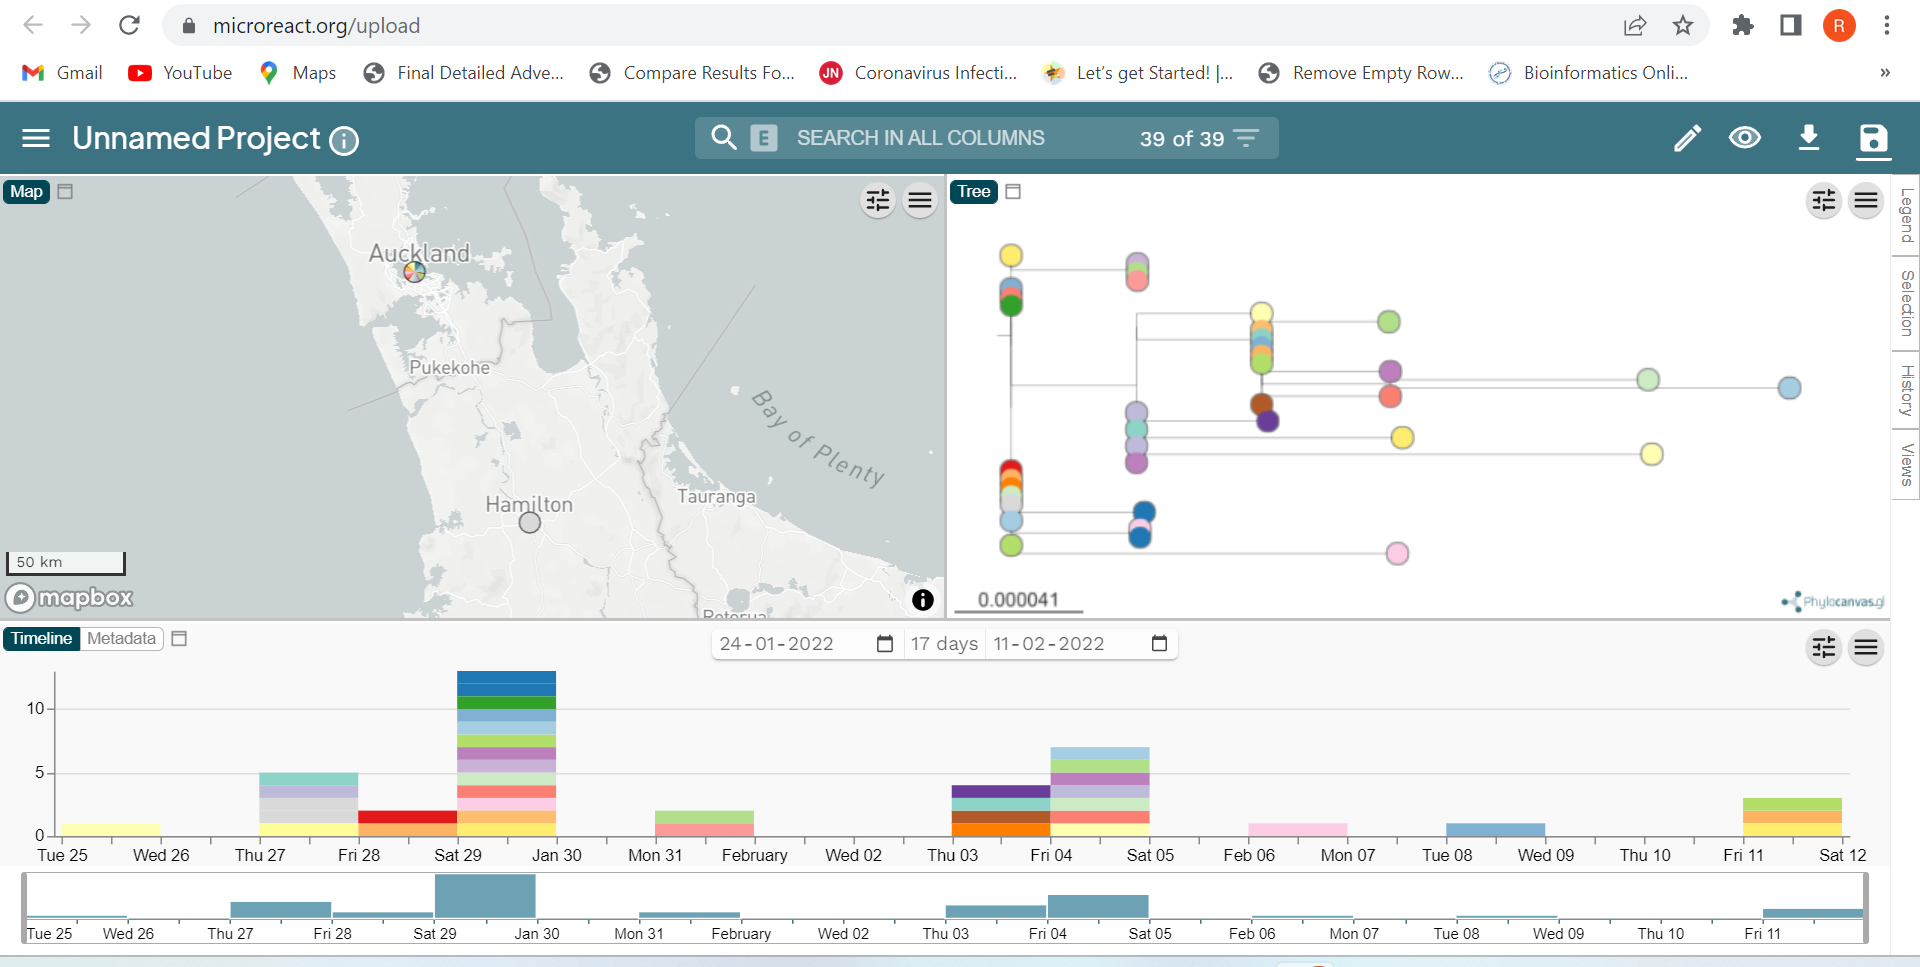**insert your microreact screen grab here**  
double click here.

**now you have the micreact project it will make it easier for you to answer the assessment questions**

Optional use snp-dist and snp-site to help you with the analysis

**save your notebook now**

In [55]:
!echo "Done"

Done


## **Part 2** Data sharing

Please follow the talk and slides in **Sections 5, 6 and 7** for instructions.  

In [56]:
!echo "Completed."

Completed.


In [57]:
!echo "Thank you for this wonderful course. I learnt a lot. I hope to attend more such courses."

Thank you for this wonderful course. I learnt a lot. I hope to attend more such courses.
